In [25]:

import torch, numpy as np, torchaudio, io, librosa
from datasets import load_dataset
import pandas as pd

from speechbrain.pretrained import SpeakerRecognition


In [2]:
dat = load_dataset('ivrit-ai/crowd-transcribe-v5')

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

In [5]:
train = dat.select_columns(['uuid', 'audio', 'orig_sentence', 'sentence', 'extra_data'])['train'].to_pandas()
# rates = train['audio']['sampling_rate']

In [6]:
train['pod_name'] = train['uuid'].apply(str.split, args=('/')).apply(list.pop, args=(0,))
train['date'] = train['uuid'].apply(str.split, args=('/')).apply(list.pop, args=(1,)).apply(str.split, args=(' ')).apply(list.pop, args=(0,))
train['duration'] = train['extra_data'].apply(dict.get, args=('duration',))
train['audio'] = train['audio'].apply(dict.get, args=('bytes',)) #This is encoded as MP3

In [7]:
train

,uuid,audio,orig_sentence,sentence,extra_data,pod_name,date,duration
0,Tziun3/2021.06.03 פרק #207 – חזרתו של היוני/343,b'ID3\x04\x00\x00\x00\x00!\\TCON\x00\x00\x00\x...,לא אני קטונתי כן אבל אני במקומו הייתי הולך על ...,"לא, זה לא אני קטונתי כן אבל אני במקומו הייתי ה...","{'attributes': None, 'duration': 6.34775510204...",Tziun3,2021.06.03,6.347755
1,MDLI/2021.12.18 MDLI – Speech Talks (Hebrew)/767,b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...,‫יותר סביר שהדברים האלה ‫נאמרו למה דברים אחרים.,‫יותר סביר שהדברים האלה ‫נאמרו לעומת דברים אחרים.,"{'attributes': None, 'duration': 3.63102040816...",MDLI,2021.12.18,3.631020
2,AnotherPodcastForStartups/2022.01.10 [מובילי ח...,b'ID3\x04\x00\x00\x00\x00\x03/TIT2\x00\x00\x00...,"ומחכים שגנב יגיע, ואז אתם תגיד לו, מה אתה עושה...","ומחכים שגנב יגיע, ואז אתם תגידו לו, מה אתה עוש...","{'attributes': None, 'duration': 5.53795918367...",AnotherPodcastForStartups,2022.01.10,5.537959
3,Geekonomy/2021.07.09 פרק #442 - אבי שוע יוניקו...,b'ID3\x04\x00\x00\x00\x00*TTDRC\x00\x00\x00\x1...,"‫אז זה לא מעניין, ‫אנחנו רואים את הקונטקסט הזה.","‫אז זה לא מעניין, ‫אנחנו נותנים את הקונטקסט הזה.","{'attributes': None, 'duration': 2.136, 'forei...",Geekonomy,2021.07.09,2.136000
4,NETfrix/2021.10.23 NETfrix shorts2 מדוע חוק הח...,b'ID3\x04\x00\x00\x00\x00\x01?TPE1\x00\x00\x00...,‫אברהם מניח שבמקרה ‫של התפלגות נורמלית...,‫אברהם מניח שבמקרה ‫של התפלגות נורמלית...,"{'attributes': None, 'duration': 2.352, 'forei...",NETfrix,2021.10.23,2.352000
...,...,...,...,...,...,...,...,...
203822,YadBenZvi/2023.12.17 רוח מן המצר - צבי היא לכל...,b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...,לכן שאלה שמאוד מעסיקה את אנשי צפת היא איך אפשר...,לכן שאלה שמאוד מעסיקה את אנשי צפת היא איך אפשר...,"{'attributes': {'retranscribe': None}, 'durati...",YadBenZvi,2023.12.17,19.152000
203823,DivreHayamim/2023.05.28 פרק 442 - מסמכי יב ה/136,b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...,"הגענו אל 30 באוקטובר, 434 לפני הספירה.","הגענו אל 30 באוקטובר, 434 לפני הספירה.","{'attributes': {'retranscribe': None}, 'durati...",DivreHayamim,2023.05.28,4.104000
203824,Geekonomy/2023.08.27 פרק #769 - הפלפל של יהלומ...,b'ID3\x04\x00\x00\x00\x00*UTDRC\x00\x00\x00\x1...,אני קונה בשוק כי אסף אביר הסביר לי שאם אני קונ...,אני קונה בשוק כי אסף אביר הסביר לי שאם אני קונ...,"{'attributes': {'retranscribe': True}, 'durati...",Geekonomy,2023.08.27,12.000000
203825,האוניברסיטה הפתוחה/2012.11.04 אלעזר ויינריב-תפ...,b'ID3\x04\x00\x00\x00\x00\x01\x00TXXX\x00\x00\...,ובמיוחד יש לבחון את השאלה,ובמיוחד יש לבחון את השאלה,"{'attributes': {'retranscribe': None}, 'durati...",האוניברסיטה הפתוחה,2012.11.04,3.056327


In [8]:
grouped = train.groupby(['pod_name', 'date'])
grouped = grouped.apply(lambda x:x)
grouped

C:\Users\Danik\AppData\Local\Temp\ipykernel_13600\1690414125.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = grouped.apply(lambda x:x)


uuid  \
pod_name                         date                                                                   
929                              2015.01.05 96225                929/2015.01.05 סימנים - בראשית יב/14   
                                 2015.01.07 184492                929/2015.01.07 סימנים - בראשית טו/9   
                                 2015.01.11 115082               929/2015.01.11 סימנים  - בראשית יז/3   
                                            124913              929/2015.01.11 סימנים  - בראשית יז/14   
                                            140837               929/2015.01.11 סימנים  - בראשית יז/2   
...                                                                                               ...   
פסיכולוגיה שיקומית בגובה העיניים 2024.01.26 138579  פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...   
                                            157215  פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...   
                                            194237  פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...   
                                            196751  פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...   
                                            201176  פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...   

                                                                                                audio  \
pod_name                         date                                                                   
929                              2015.01.05 96225   b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...   
                                 2015.01.07 184492  b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...   
                                 2015.01.11 115082  b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...   
                                            124913  b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...   
                                            140837  b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00...   
...                                                                                               ...   
פסיכולוגיה שיקומית בגובה העיניים 2024.01.26 138579  b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...   
                                            157215  b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...   
                                            194237  b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...   
                                            196751  b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...   
                                            201176  b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...   

                                                                                        orig_sentence  \
pod_name                         date                                                                   
929                              2015.01.05 96225   זה ספר שבנוי לפי מדרגות, ובמדרגה השנייה קוראים...   
                                 2015.01.07 184492  אמא, חשיכה גדולה, ארבע מאות שנות שהיא אבוד, אב...   
                                 2015.01.11 115082  מכניס את עצמו, מכניס איזשהו סוג של נוכחות אלוה...   
                                            124913  עברית המילה היא הנגיעה האלוהית, כמו שאת אומרת,...   
                                            140837  על קריטת האורלה, שימו לב מה הוא עושה כאן, הוא ...   
...                                                                                               ...   
פסיכולוגיה שיקומית בגובה העיניים 2024.01.26 138579           ואז יוצא שהרבה פעמים הורים מגדלים ילדים.   
                                            157215  והשוו בעצם את התפיסת מוגבלות שלהם לתפיסה של הה...   
                                            194237                           והיא מרבה ככה מקום לאדם.   
                                            196751           אני חושבת שיש הרבה נטייאלן שמקצוע עליהם.   
                                            201176  ראשה היא אפילו לא מבינה שהיא אישה עם מוגבלות ו...   


In [ ]:
for (pod, date), group in train.groupby(['pod_name', 'date']):
    ...
torchaudio.load(io.BytesIO(group.iloc[0]['audio']), format='MP3')

(tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0023, -0.0022,  0.0012],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.0023, -0.0022,  0.0012]]),
 44100)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
c:\Users\Danik\AppData\Local\Programs\Python\Python311\Lib\site-packages\speechbrain\utils\fetching.py:151: UserWarning: Using SYMLINK strategy on Windows for fetching potentially requires elevated privileges and is not recommended. See `LocalStrategy` documentation.
  warnings.warn(
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
c:\Users\Danik\AppData\Local\Programs\Python\Python311\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec

MEAN IS: 21.54594651952462
MAX IS: 617
We have 9424 groups
we have 512 sames out of 657 twos


,uuid,audio,orig_sentence,sentence,extra_data,pod_name,date,duration
120796,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,"והשיחה. וגם מבחינת הזהות, את אומרת, פתאום באמצ...","והשיחה. וגם מבחינת הזהות, את אומרת, פתאום באמצ...","{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,9.613061
126673,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,לבין כמה אנחנו רוצים להגיד לו?,לבין כמה אנחנו רוצים להגיד לו?,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,2.142041
127498,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,"צד שני, את יודעת, נכון, הייתה בחורה צעירה שציפ...","צד שני, את יודעת, נכון, הייתה בחורה צעירה שציפ...","{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,20.793469
138579,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,ואז יוצא שהרבה פעמים הורים מגדלים ילדים.,ואז יוצא שהרבה פעמים הורים מגדלים ילדים,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,3.631020
157215,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,והשוו בעצם את התפיסת מוגבלות שלהם לתפיסה של הה...,והשוו בעצם את התפיסת מוגבלות שלהם לתפיסה של הה...,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,4.545306
194237,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,והיא מרבה ככה מקום לאדם.,ועם הרבה ככה מקום לאדם.,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,3.317551
196751,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,אני חושבת שיש הרבה נטייאלן שמקצוע עליהם.,אני חושבת שיש הרבה נטייה לאנשי מקצוע ל.. אמ..,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,3.160816
201176,פסיכולוגיה שיקומית בגובה העיניים/2024.01.26 עו...,b'ID3\x04\x00\x00\x00\x00\x01rTPE1\x00\x00\x00...,ראשה היא אפילו לא מבינה שהיא אישה עם מוגבלות ו...,בראשה היא אפילו לא מבינה שהיא אישה עם מוגבלות ...,"{'attributes': {'retranscribe': None}, 'durati...",פסיכולוגיה שיקומית בגובה העיניים,2024.01.26,11.598367


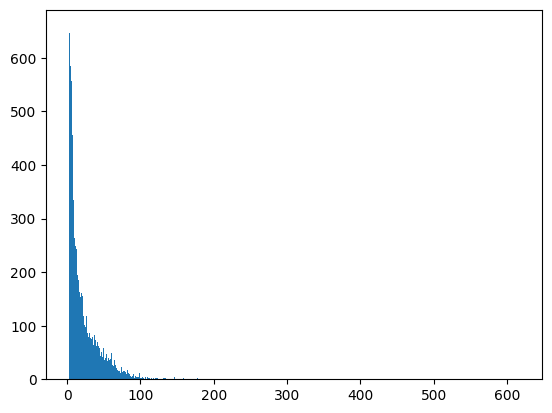

In [ ]:
verification = SpeakerRecognition.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb",  # model repository on Hugging Face
    savedir="pretrained_models/spkrec-ecapa-voxceleb",
    run_opts={"device": 'cuda'}
)

c = 0
sizes = []
sames = 0
twos = 0
gotcha = 0
for (pod, date), group in train.groupby(['pod_name', 'date']):
    if group.shape[0] > 1:
        sizes.append(group.shape[0])
        c += 1


        if group.shape[0] == 2:
            w0, sr0 = torchaudio.load(io.BytesIO(group.iloc[0]['audio']), format='mp3')
            w1, sr1 = torchaudio.load(io.BytesIO(group.iloc[1]['audio']), format='mp3')

            w0 = torch.tensor(librosa.resample(librosa.to_mono(np.array(w0)), orig_sr=sr0, target_sr=16000))
            w1 = torch.tensor(librosa.resample(librosa.to_mono(np.array(w1)), orig_sr=sr1, target_sr=16000))

            score, prediction = verification.verify_batch(w0.to('cuda'),w1.to('cuda'))
            
            if prediction.item(): sames += 1

            if (not(prediction.item())) and gotcha == 0:
                gotcha = 1
                torchaudio.save('./sample0.wav',w0.unsqueeze(0), sample_rate=16000)
                torchaudio.save('./sample1.wav',w1.unsqueeze(0), sample_rate=16000)
                
            twos += 1


print('MEAN IS: ' + str(np.array(sizes).mean()))
print('MAX IS: ' + str(np.array(sizes).max()))


import matplotlib.pyplot as plt

plt.hist(np.array((sizes)), bins=617)
print(f'We have {c} groups')
print(f'we have {sames} sames out of {twos} twos')
group


In [ ]:
verification = SpeakerRecognition.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb",  # model repository on Hugging Face
    savedir="pretrained_models/spkrec-ecapa-voxceleb",
    run_opts={"device": 'cuda'}
)

MAX_TRIES = 10
num_samples = 0

for (pod, date), group in train.groupby(['pod_name', 'date']):
    if group.shape[0] > 1:
        
        idx_count = min(group.shape[0],MAX_TRIES)

        for i in range(group.shape[0]):
            indices = np.random.choice(group.shape[0], size=idx_count, replace=False)

            w0, sr0 = torchaudio.load(io.BytesIO(group.iloc[i]['audio']), format='mp3')
            w0 = torch.tensor(librosa.resample(librosa.to_mono(np.array(w0)), orig_sr=sr0, target_sr=16000)).to('cuda')

            for idx in indices:
                ...
                w1, sr1 = torchaudio.load(io.BytesIO(group.iloc[idx]['audio']), format='mp3')

                w1 = torch.tensor(librosa.resample(librosa.to_mono(np.array(w1)), orig_sr=sr1, target_sr=16000)).to('cuda')

                score, prediction = verification.verify_batch(w0,w1)

                if prediction.item(): #Found enrollment 🚀
                    ...
                    num_samples += 1
                    #TODO: how do we save the enrollment? index? raw data? should decide